# Exploratory Data Analysis and Machine Learning Classification on Customer Churn

In this notebook, I performed EDA on the 'Customer Churn Dataset'. I visualized the data using the Seaborn and other data visualization libraries. 


<a id="1"></a>
# Importing the Necessary Libraries

In [1]:
! pip3 install preprocessing

In [2]:
!pip install pandas_profiling

In [3]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport


import warnings
warnings.filterwarnings("ignore")

<a id="2"></a>

# Read Datas & Explanation of Features & Information About Datasets

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [5]:
dataset = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
dataset.head(490)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0    7590-VHVEG  Female              0     Yes         No       1   
1    5575-GNVDE    Male              0      No         No      34   
2    3668-QPYBK    Male              0      No         No       2   
3    7795-CFOCW    Male              0      No         No      45   
4    9237-HQITU  Female              0      No         No       2   
..          ...     ...            ...     ...        ...     ...   
485  7971-HLVXI    Male              0     Yes        Yes      72   
486  9094-AZPHK  Female              0      No         No      15   
487  3649-JPUGY    Male              0      No         No      72   
488  4472-LVYGI  Female              0     Yes        Yes       0   
489  8372-JUXUI    Male              0      No        Yes       1   

    PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             No  No phone service             DSL             No  ...   
1            Yes                No             DSL            Yes  ...   
2            Yes                No             DSL            Yes  ...   
3             No  No phone service             DSL            Yes  ...   
4            Yes                No     Fiber optic             No  ...   
..           ...               ...             ...            ...  ...   
485          Yes               Yes     Fiber optic             No  ...   
486          Yes               Yes     Fiber optic             No  ...   
487          Yes               Yes             DSL             No  ...   
488           No  No phone service             DSL            Yes  ...   
489          Yes               Yes     Fiber optic             No  ...   

    DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                 No          No          No              No  Month-to-month   
1                Yes          No          No              No        One year   
2                 No          No          No              No  Month-to-month   
3                Yes         Yes          No              No        One year   
4                 No          No          No              No  Month-to-month   
..               ...         ...         ...             ...             ...   
485               No          No          No             Yes        Two year   
486               No          No         Yes             Yes  Month-to-month   
487              Yes         Yes         Yes             Yes        Two year   
488              Yes         Yes         Yes              No        Two year   
489               No          No          No              No  Month-to-month   

    PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                Yes           Electronic check          29.85         29.85   
1                 No               Mailed check          56.95        1889.5   
2                Yes               Mailed check          53.85        108.15   
3                 No  Bank transfer (automatic)          42.30       1840.75   
4                Yes           Electronic check          70.70        151.65   
..               ...                        ...            ...           ...   
485              Yes    Credit card (automatic)          84.50       6130.85   
486              Yes           Electronic check         100.15          1415   
487              Yes  Bank transfer (automatic)          88.60       6201.95   
488              Yes  Bank transfer (automatic)          52.55                 
489              Yes           Electronic check          74.35         74.35   

    Churn  
0      No  
1      No  
2     Yes  
3      No  
4     Yes  
..    ...  
485    No  
486    No  
487    No  
488    No  
489   Yes  

[490 rows x 21 columns]

In [6]:
dataset.drop("customerID", axis=1, inplace=True)

In [7]:
dataset['TotalCharges'] = dataset['TotalCharges'].apply(lambda x: 0 if x == ' ' else x)

In [8]:
dataset["TotalCharges"] = pd.to_numeric(dataset["TotalCharges"], errors='coerce')

<a id="3"></a>

## Variable Descriptions

* gender    -->    Whether the customer is a male or a female     
* SeniorCitizen   -->    Whether the customer is a senior citizen or not (1, 0)
* Partner       -->       Whether the customer has a partner or not (Yes, No)
* Dependents       -->   Whether the customer has dependents or not (Yes, No)
* tenure            -->  Number of months the customer has stayed with the company
* PhoneService      -->  Whether the customer has a phone service or not (Yes, No)
* MultipleLines     -->  Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService   -->  Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity    -->  Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup      -->  Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection  -->  Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport       -->  Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV       -->  Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies   -->  Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract           -->  The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling  -->  Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod     -->  The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges    -->  The amount charged to the customer monthly
* TotalCharges      -->  The total amount charged to the customer
* Churn              -->  Whether the customer churned or not (Yes or No)

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
dataset.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [11]:
dataset.describe().T

count         mean          std    min     25%      50%  \
SeniorCitizen   7043.0     0.162147     0.368612   0.00    0.00     0.00   
tenure          7043.0    32.371149    24.559481   0.00    9.00    29.00   
MonthlyCharges  7043.0    64.761692    30.090047  18.25   35.50    70.35   
TotalCharges    7043.0  2279.734304  2266.794470   0.00  398.55  1394.55   

                    75%      max  
SeniorCitizen      0.00     1.00  
tenure            55.00    72.00  
MonthlyCharges    89.85   118.75  
TotalCharges    3786.60  8684.80

SeniorCitizen is actually a categorical hence the 25%-50%-75% distribution is not propoer

75% customers have tenure less than 55 months

Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month

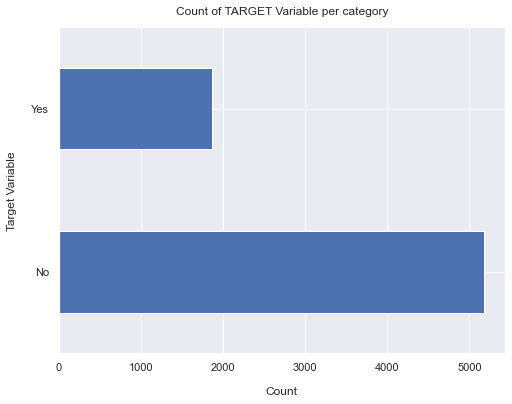

In [12]:
dataset['Churn'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [13]:
dataset.isnull().sum().sum()

0

In [14]:
100*dataset['Churn'].value_counts()/len(dataset['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [15]:
dataset['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

* Data is highly imbalanced, ratio = 73:27<br>
* So we analyse the data with other features while taking the target values separately to get some insights.

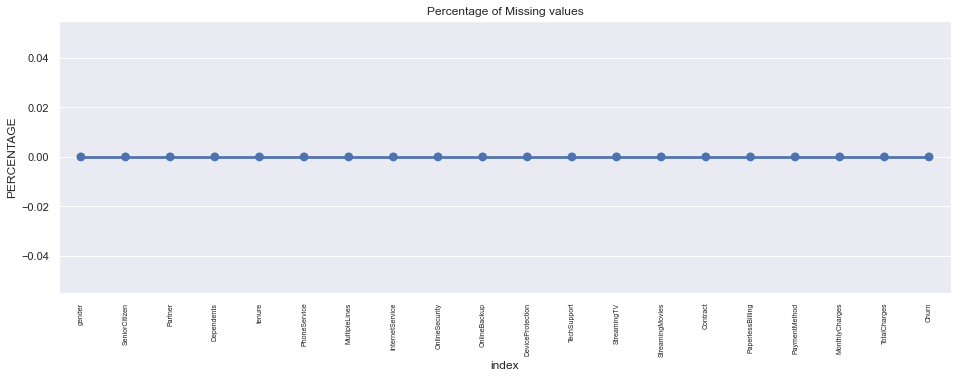

In [16]:
missing = pd.DataFrame((dataset.isnull().sum())*100/dataset.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot('index',0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

### Missing Data - Initial Intuition

* Here, we don't have any missing data.

General Thumb Rules:

* For features with less missing values- can use regression to predict the missing values or fill with the mean of the values present, depending on the feature.
* For features with very high number of missing values- it is better to drop those columns as they give very less insight on analysis.
* As there's no thumb rule on what criteria do we delete the columns with high number of missing values, but generally you can delete the columns, if you have more than 30-40% of missing values.

<a id="4"></a>

## Univariate Variable Analysis

* Categorical Variables: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

* Numerical Variables: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

<a id="5"></a>

### Categorical Variables

In [17]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [18]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

Categorical variables:
['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


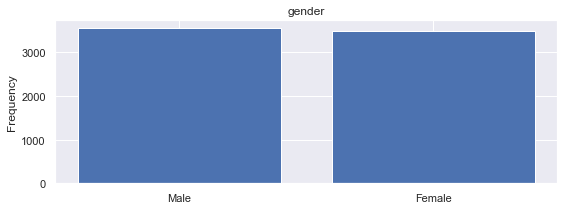

gender:
Male      3555
Female    3488
Name: gender, dtype: int64


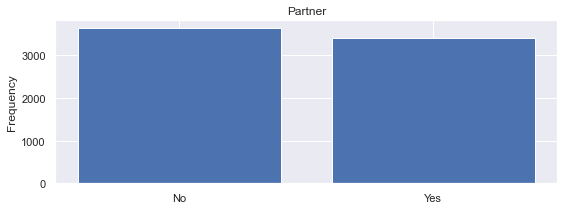

Partner:
No     3641
Yes    3402
Name: Partner, dtype: int64


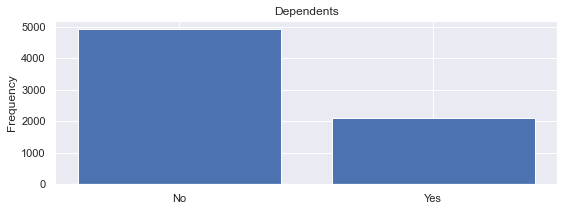

Dependents:
No     4933
Yes    2110
Name: Dependents, dtype: int64


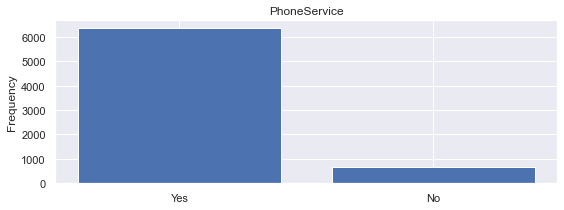

PhoneService:
Yes    6361
No      682
Name: PhoneService, dtype: int64


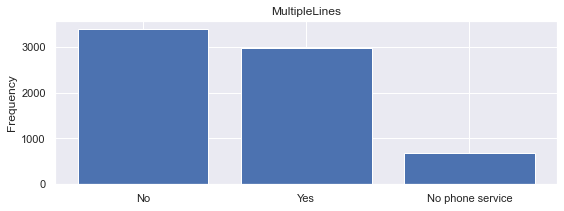

MultipleLines:
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


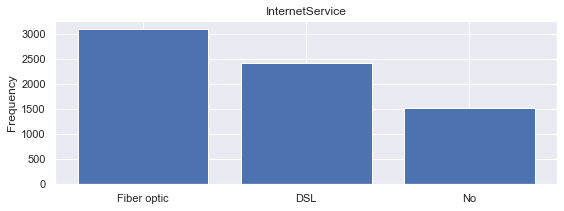

InternetService:
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


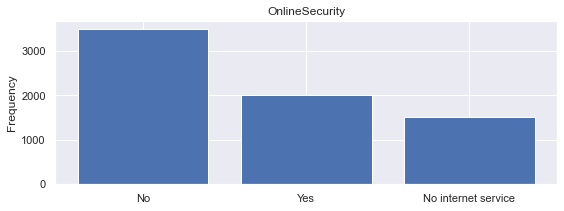

OnlineSecurity:
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


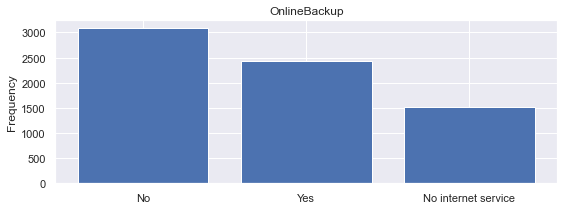

OnlineBackup:
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


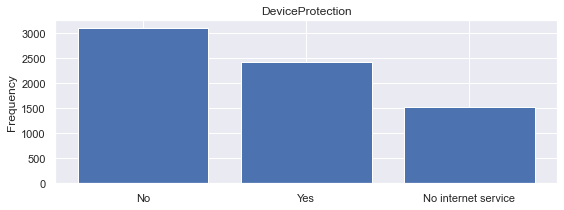

DeviceProtection:
No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


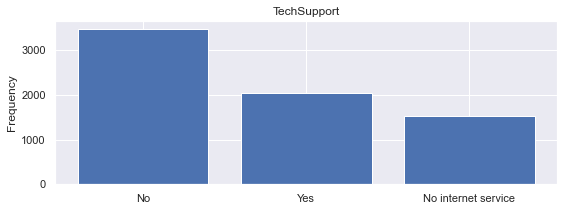

TechSupport:
No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


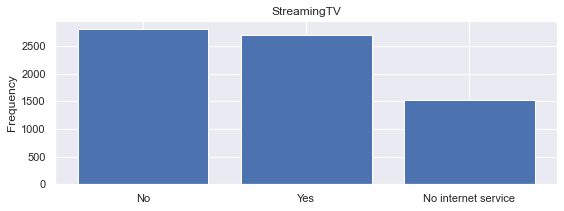

StreamingTV:
No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


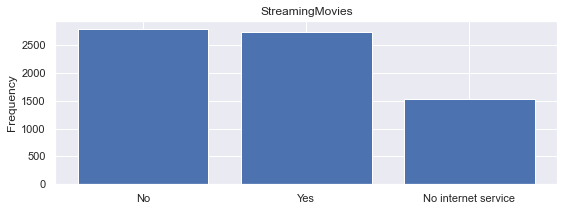

StreamingMovies:
No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


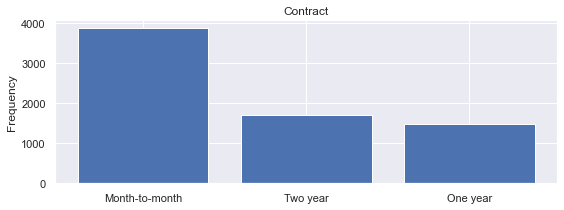

Contract:
Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


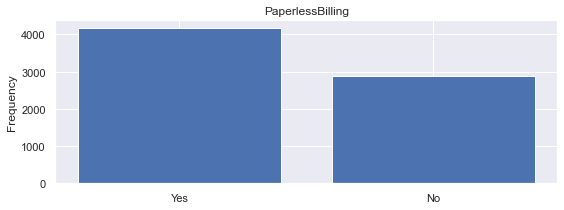

PaperlessBilling:
Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


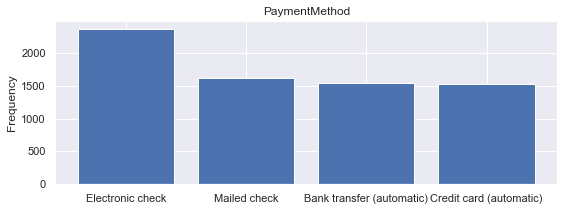

PaymentMethod:
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


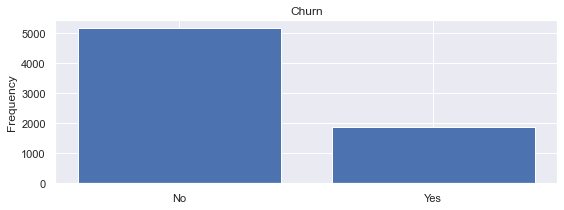

Churn:
No     5174
Yes    1869
Name: Churn, dtype: int64


In [19]:
for c in categorical_list:
    bar_plot(c)

<a id="6"></a>

### Numerical Variables

In [20]:
numerical_int64 = (dataset.dtypes == "int64")
numerical_int64_list = list(numerical_int64[numerical_int64].index)

print("Variables:")
print(numerical_int64_list)

Variables:
['SeniorCitizen', 'tenure']


In [21]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

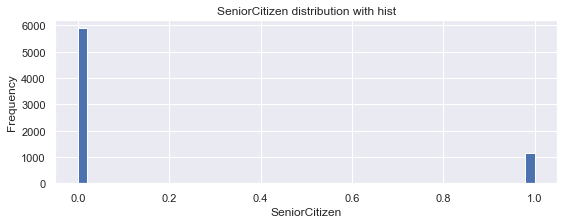

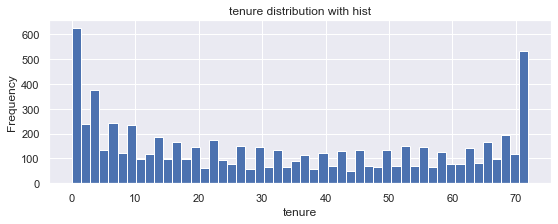

In [22]:
for n in numerical_int64_list:
    plot_hist(n)

## Non senior Citizens are high churners

In [23]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

Numerical variables:
['MonthlyCharges', 'TotalCharges']


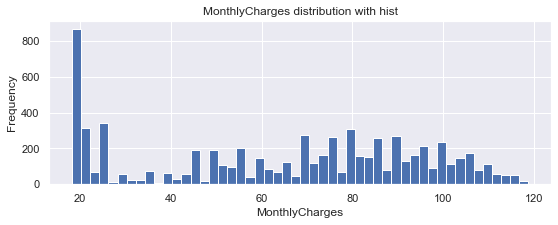

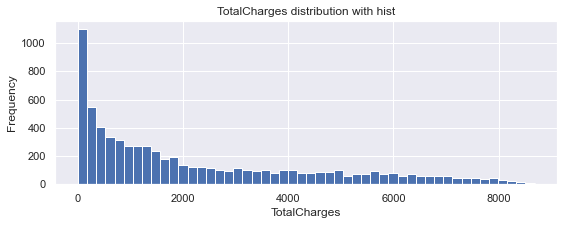

In [24]:
for n in numerical_float64_list:
    plot_hist(n)

<a id="7"></a>
# Basic Data Analysis

<a id="8"></a>

## Distribution of Each Feature

These graphs show the distribution of each feature within itself.

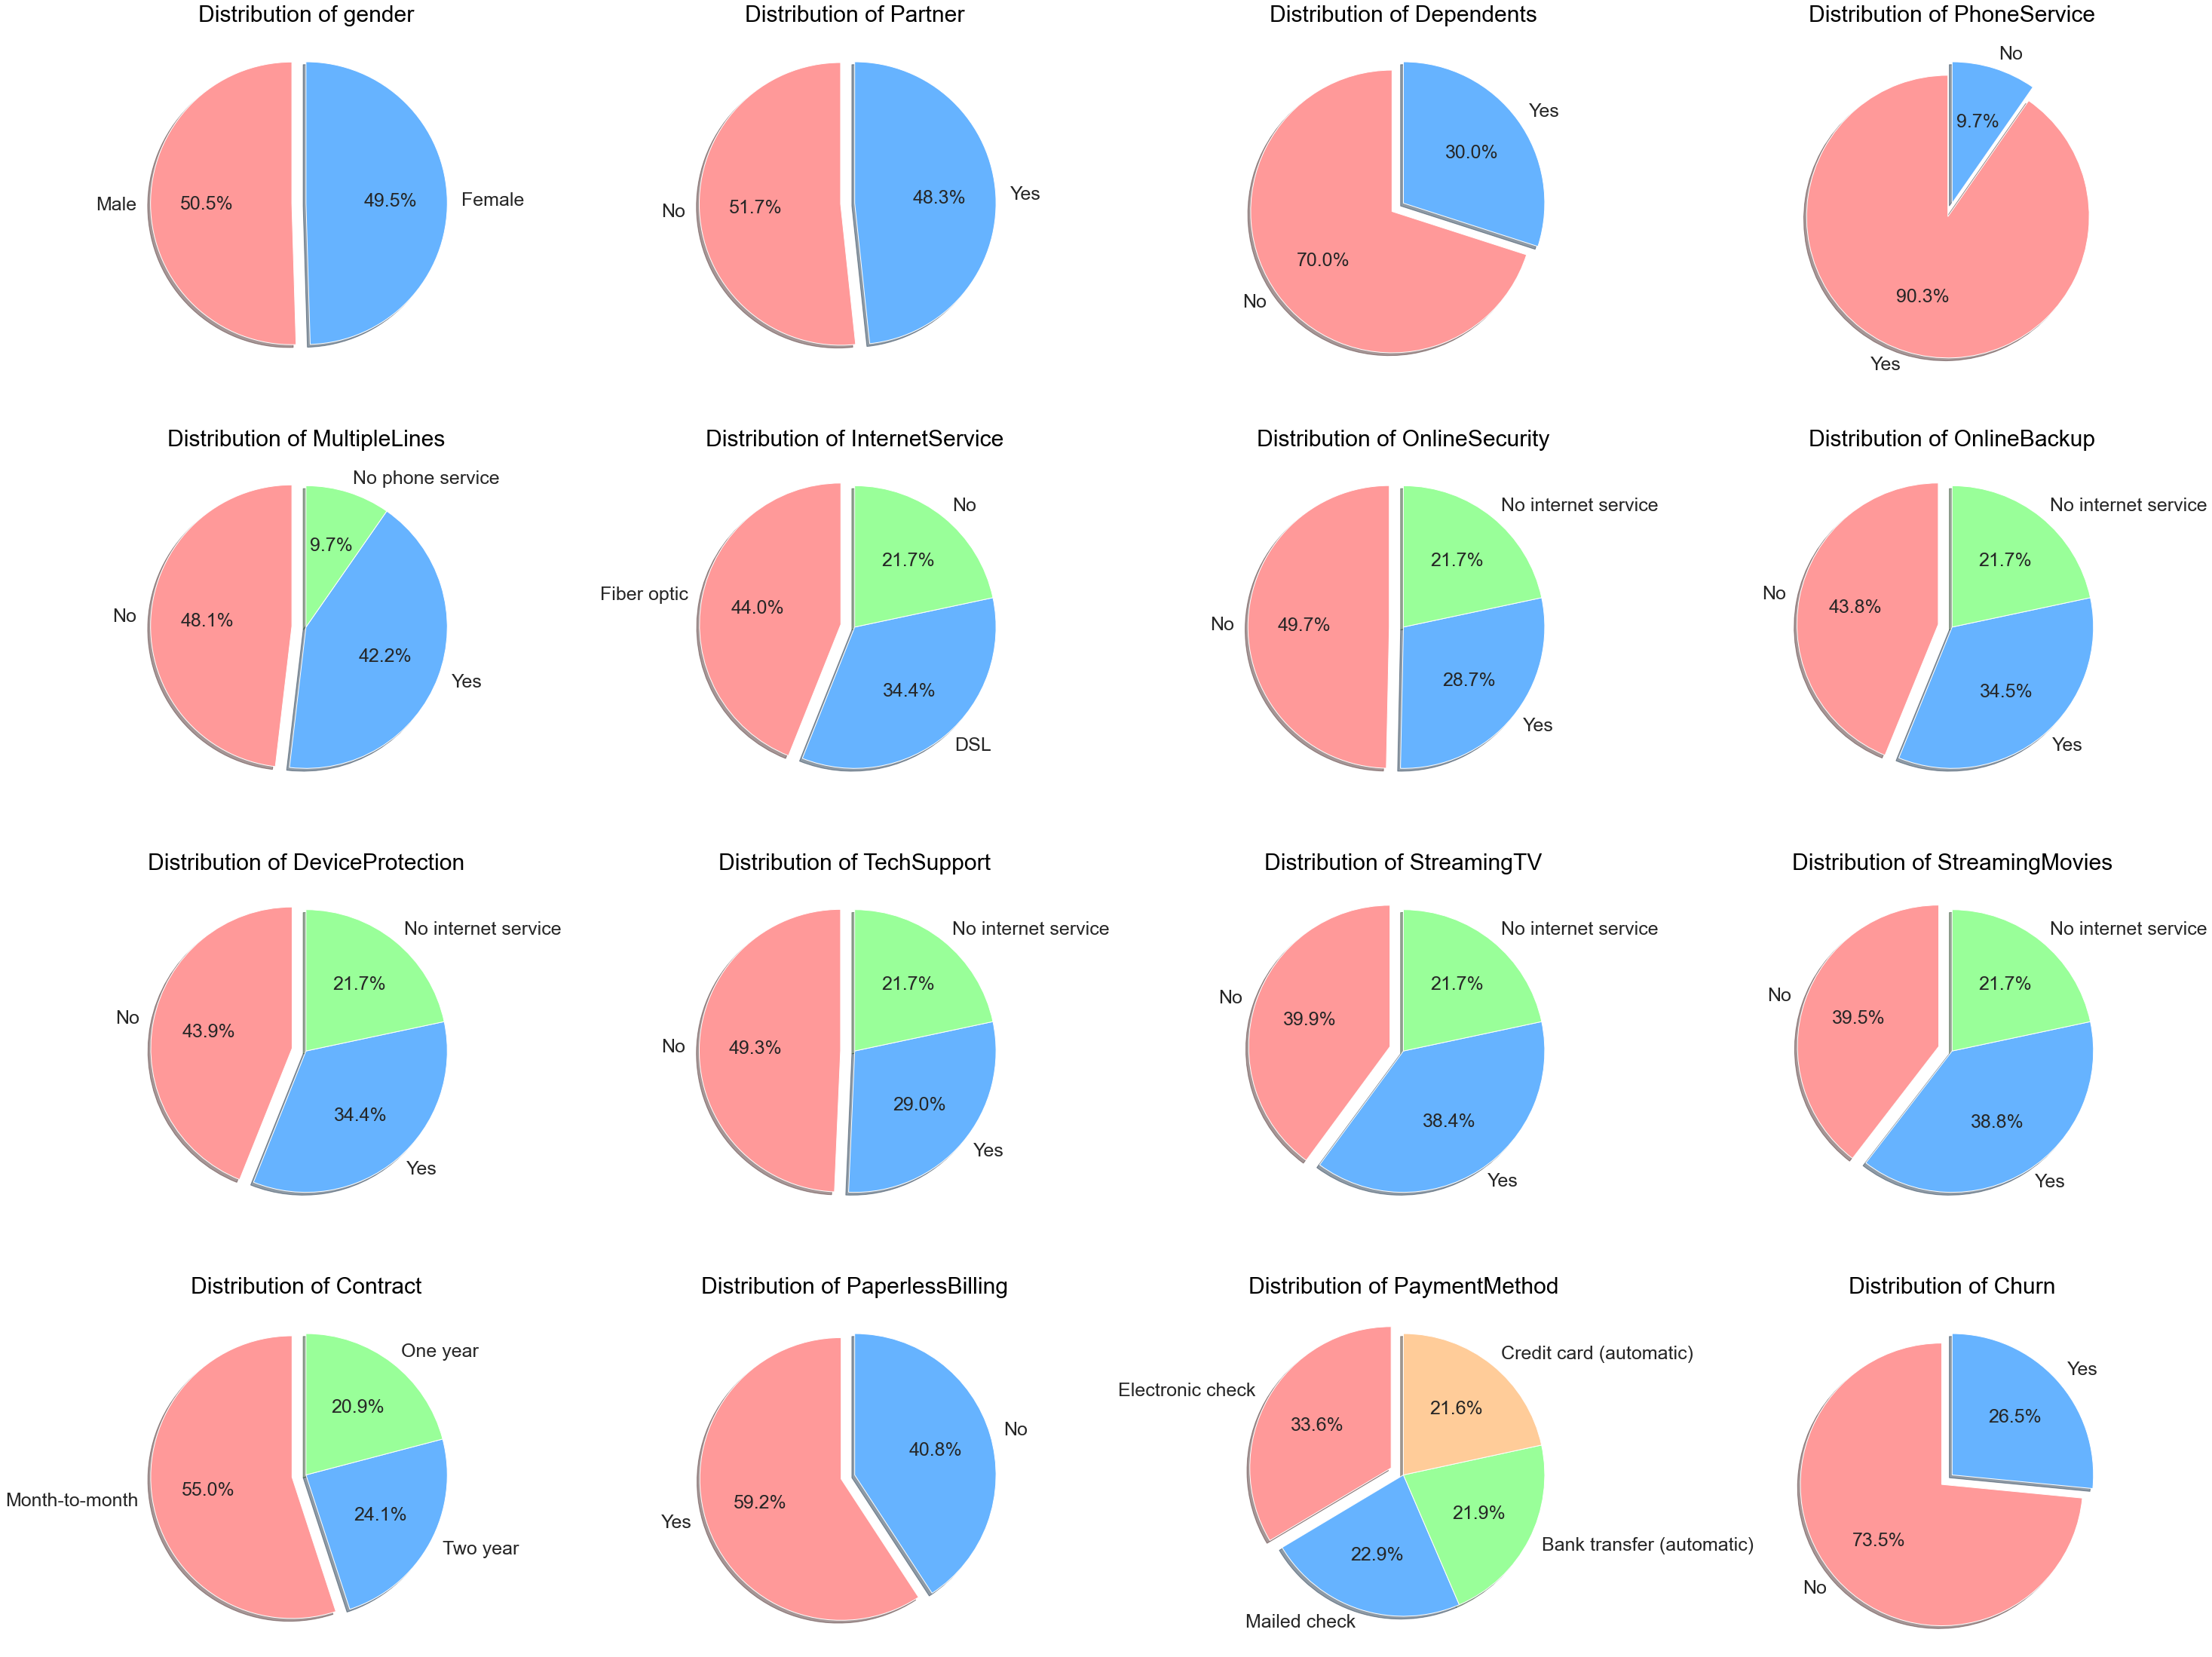

In [25]:
plt.figure(figsize=(50,50))
j = 0

for i in categorical_list:
    colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']
    
    labels = dataset[i].value_counts().index
    sizes = dataset[i].value_counts().values
    
    unique = len(dataset[i].unique())
    if(unique == 2):
        myexplode = [0.1, 0]
    if(unique == 3):
        myexplode = [0.1, 0,0]
    if(unique == 4):
        myexplode = [0.1,0,0,0]
    
    plt.subplot(5,4,j+1)
    plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%',textprops={'fontsize': 25})
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 30)
    j += 1

<a id="9"></a>

## Distributions of Each Feature According to 'Churn'

These graphs show the distribution of the variable in each feature according to 'Churn'.

### Gender

<AxesSubplot:title={'center':'gender = Male'}, xlabel='Churn'>

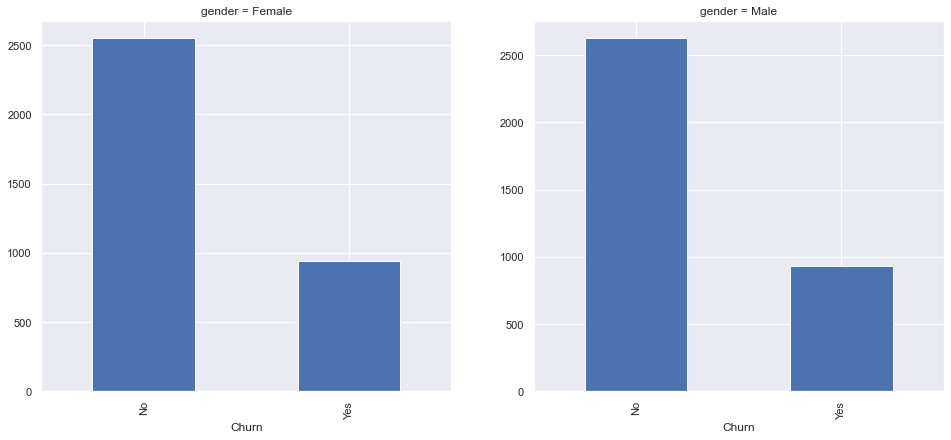

In [26]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('gender = Female')
dataset.groupby('gender').Churn.value_counts().loc['Female'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('gender = Male')
dataset.groupby('gender').Churn.value_counts().loc['Male'].plot(kind='bar')

### Partner 

<AxesSubplot:title={'center':'Partner = No'}, xlabel='Churn'>

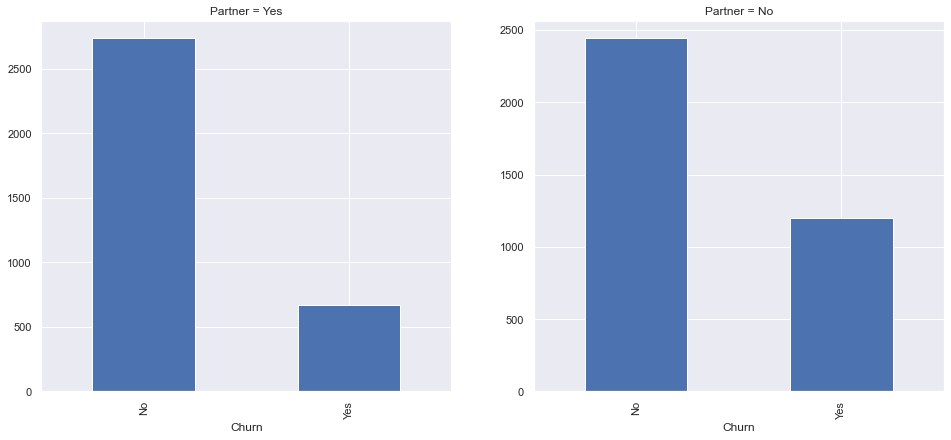

In [27]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Partner = Yes')
dataset.groupby('Partner').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Partner = No')
dataset.groupby('Partner').Churn.value_counts().loc['No'].plot(kind='bar')

### Dependents

<AxesSubplot:title={'center':'Dependents = No'}, xlabel='Churn'>

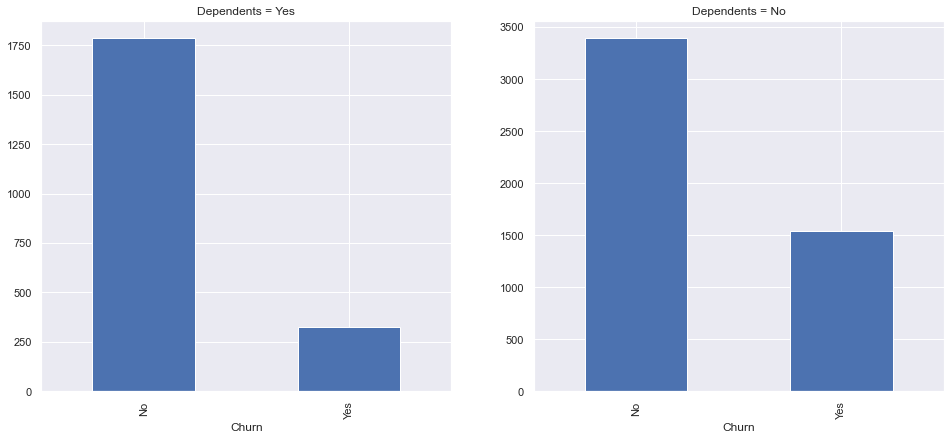

In [28]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Dependents = Yes')
dataset.groupby('Dependents').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Dependents = No')
dataset.groupby('Dependents').Churn.value_counts().loc['No'].plot(kind='bar')

### PhoneService

<AxesSubplot:title={'center':'PhoneService = No'}, xlabel='Churn'>

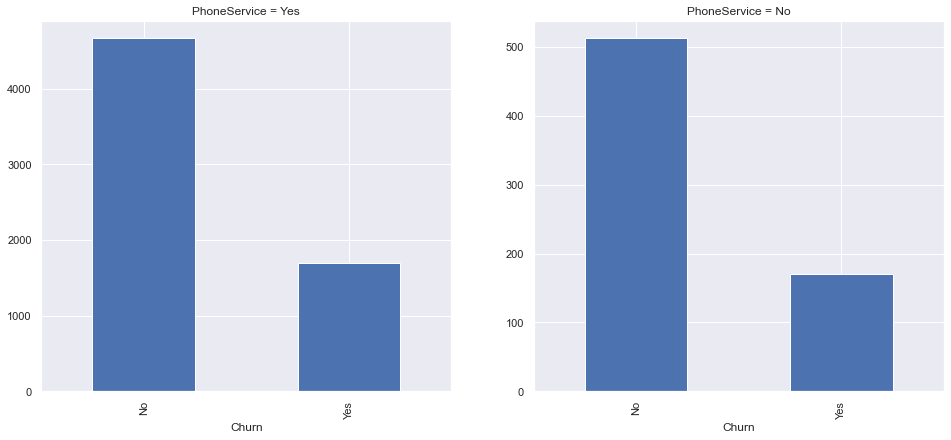

In [29]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('PhoneService = Yes')
dataset.groupby('PhoneService').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('PhoneService = No')
dataset.groupby('PhoneService').Churn.value_counts().loc['No'].plot(kind='bar')

### MultipleLines

<AxesSubplot:title={'center':'MultipleLines = No phone service'}, xlabel='Churn'>

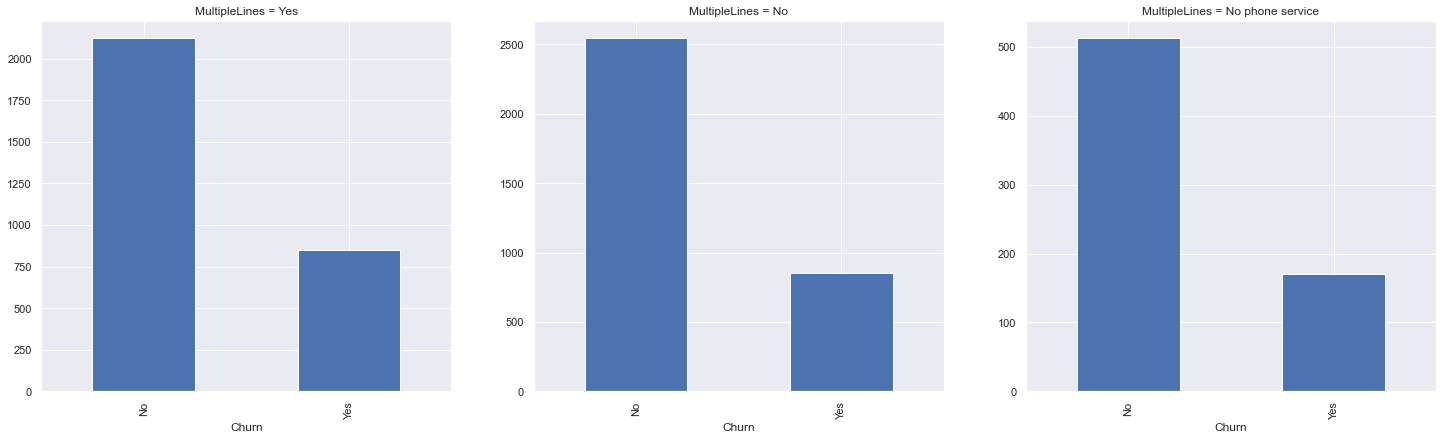

In [30]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('MultipleLines = Yes')
dataset.groupby('MultipleLines').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('MultipleLines = No')
dataset.groupby('MultipleLines').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('MultipleLines = No phone service')
dataset.groupby('MultipleLines').Churn.value_counts().loc['No phone service'].plot(kind='bar')

### InternetService

<AxesSubplot:title={'center':'InternetService = Fiber optic'}, xlabel='Churn'>

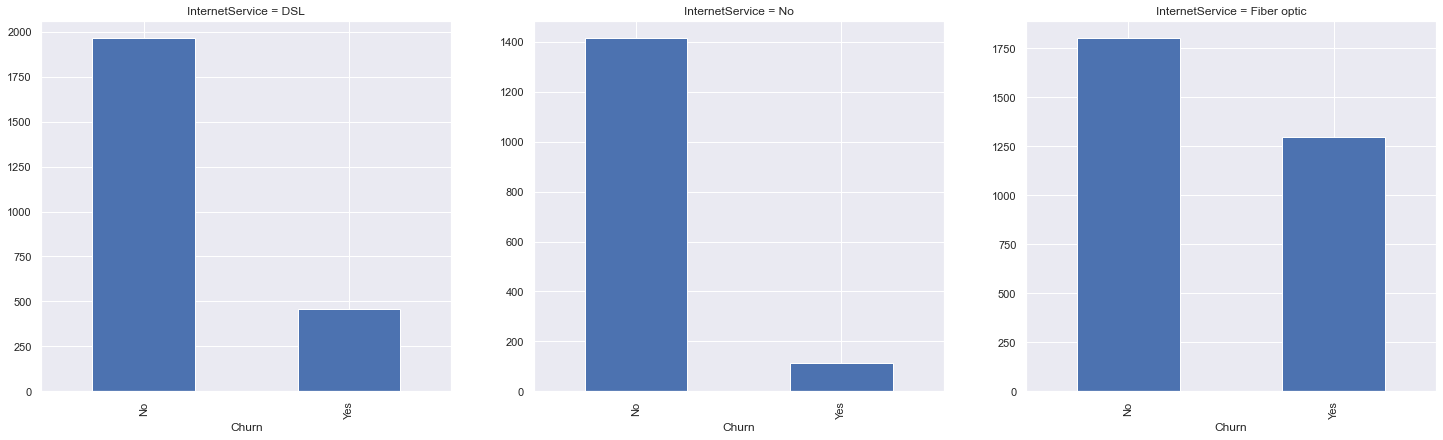

In [31]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('InternetService = DSL')
dataset.groupby('InternetService').Churn.value_counts().loc['DSL'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('InternetService = No')
dataset.groupby('InternetService').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('InternetService = Fiber optic')
dataset.groupby('InternetService').Churn.value_counts().loc['Fiber optic'].plot(kind='bar')

### OnlineSecurity

<AxesSubplot:title={'center':'OnlineSecurity = No internet service'}, xlabel='Churn'>

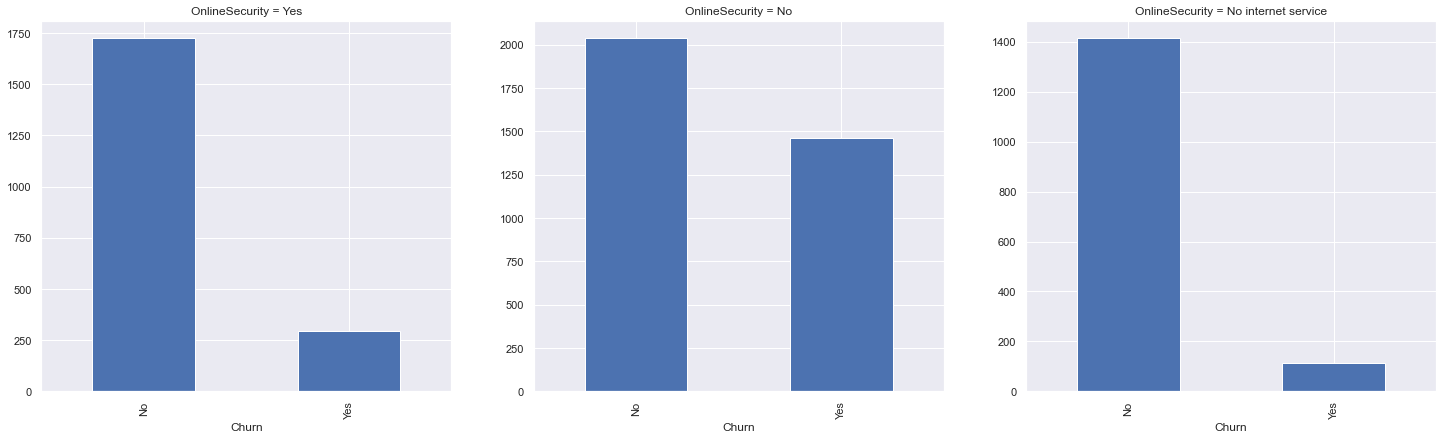

In [32]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineSecurity = Yes')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineSecurity = No')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineSecurity = No internet service')
dataset.groupby('OnlineSecurity').Churn.value_counts().loc['No internet service'].plot(kind='bar')

### OnlineBackup

<AxesSubplot:title={'center':'OnlineBackup = No internet service'}, xlabel='Churn'>

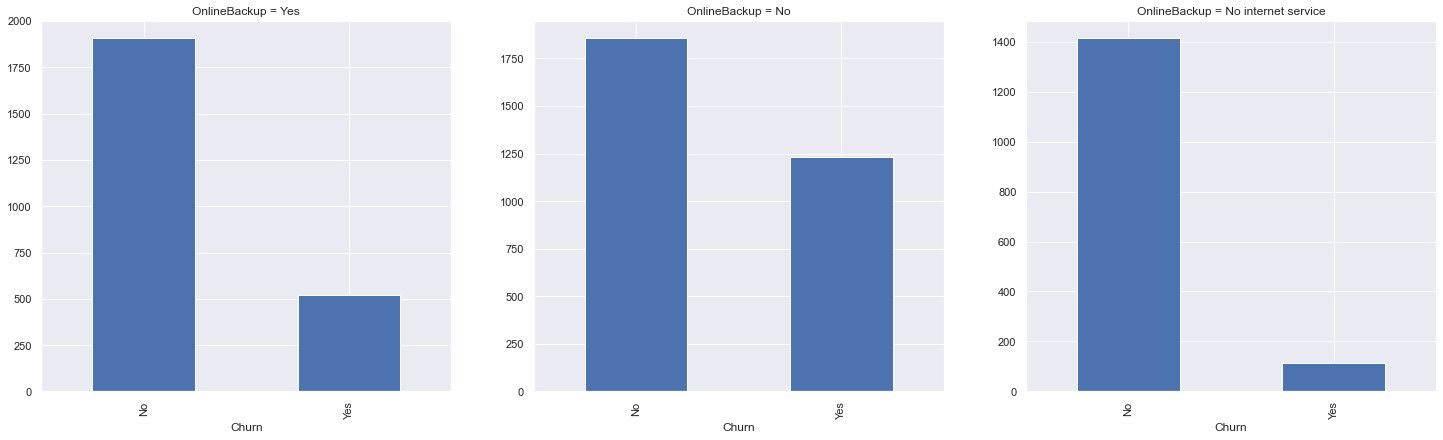

In [33]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('OnlineBackup = Yes')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('OnlineBackup = No')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('OnlineBackup = No internet service')
dataset.groupby('OnlineBackup').Churn.value_counts().loc['No internet service'].plot(kind='bar')

### DeviceProtection

<AxesSubplot:title={'center':'DeviceProtection = No internet service'}, xlabel='Churn'>

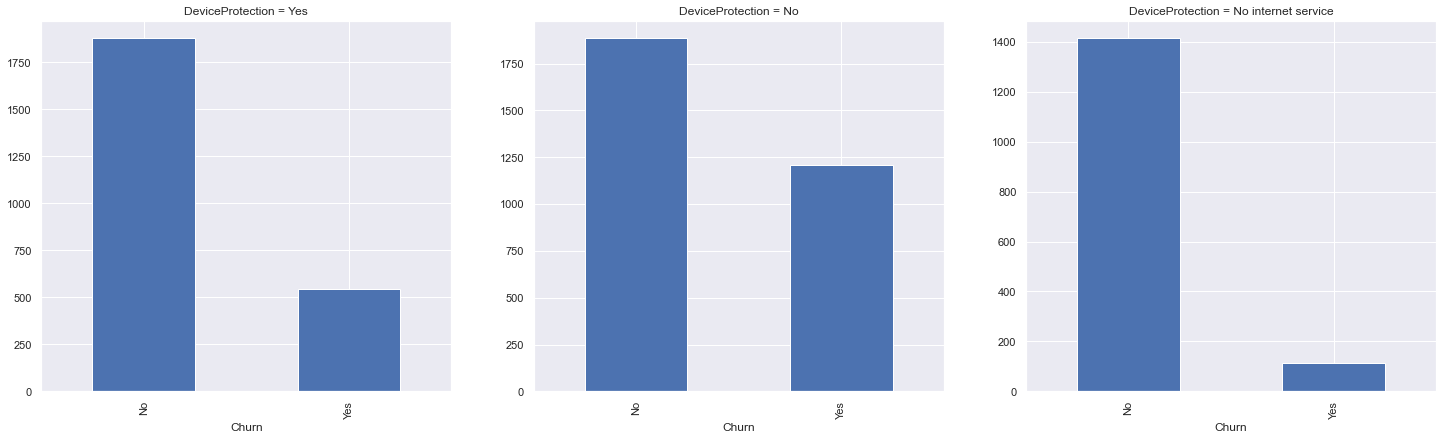

In [34]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('DeviceProtection = Yes')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('DeviceProtection = No')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('DeviceProtection = No internet service')
dataset.groupby('DeviceProtection').Churn.value_counts().loc['No internet service'].plot(kind='bar')

### TechSupport

<AxesSubplot:title={'center':'TechSupport = No internet service'}, xlabel='Churn'>

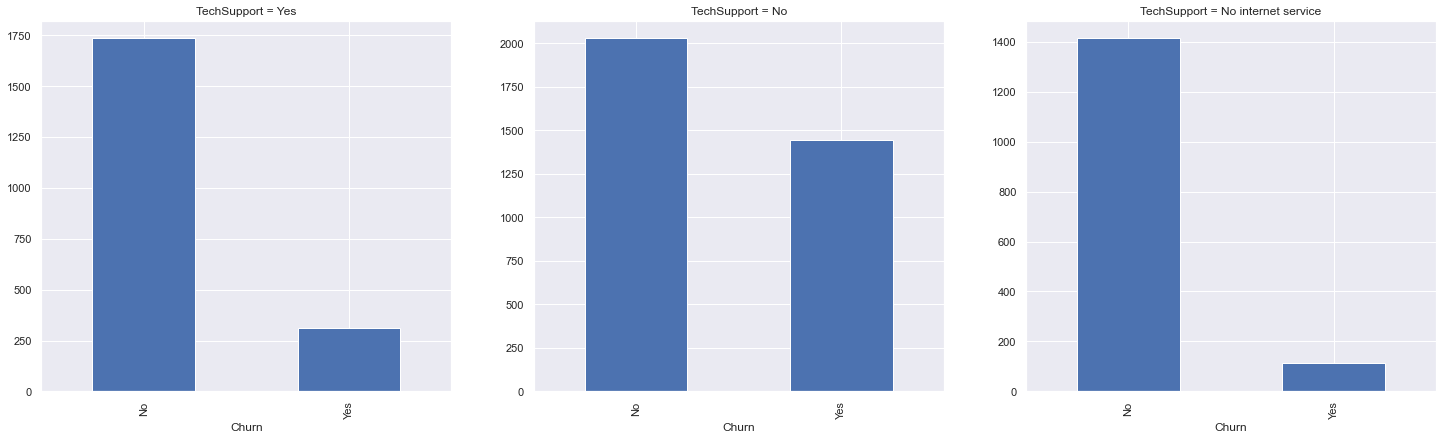

In [35]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('TechSupport = Yes')
dataset.groupby('TechSupport').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('TechSupport = No')
dataset.groupby('TechSupport').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('TechSupport = No internet service')
dataset.groupby('TechSupport').Churn.value_counts().loc['No internet service'].plot(kind='bar')

## No Online Security, No Online Backup and No Tech Support category are high churners

### StreamingTV

<AxesSubplot:title={'center':'StreamingTV = No internet service'}, xlabel='Churn'>

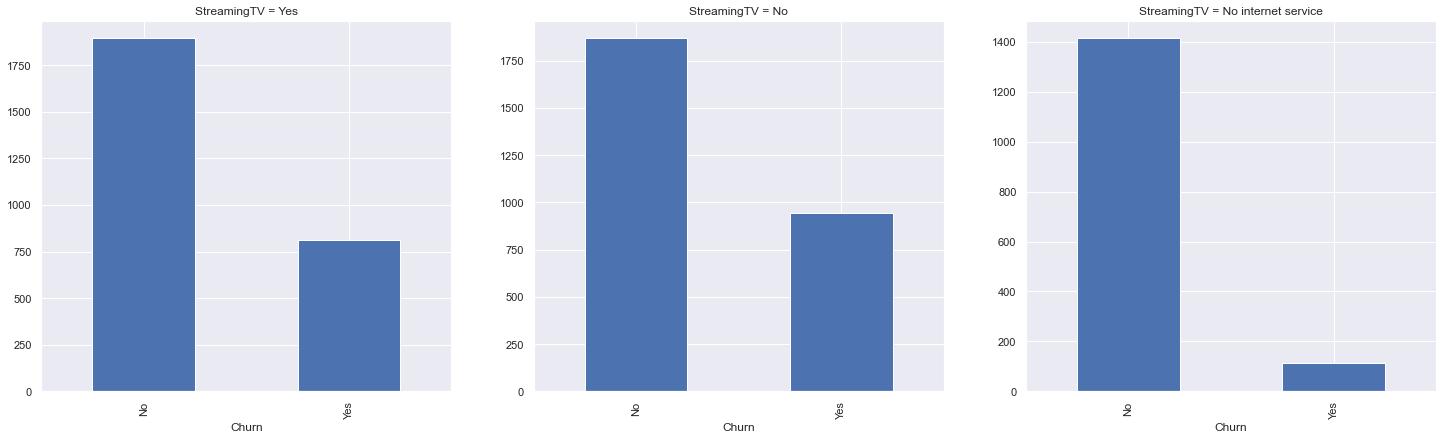

In [36]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingTV = Yes')
dataset.groupby('StreamingTV').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingTV = No')
dataset.groupby('StreamingTV').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingTV = No internet service')
dataset.groupby('StreamingTV').Churn.value_counts().loc['No internet service'].plot(kind='bar')

### StreamingMovies

<AxesSubplot:title={'center':'StreamingMovies = No internet service'}, xlabel='Churn'>

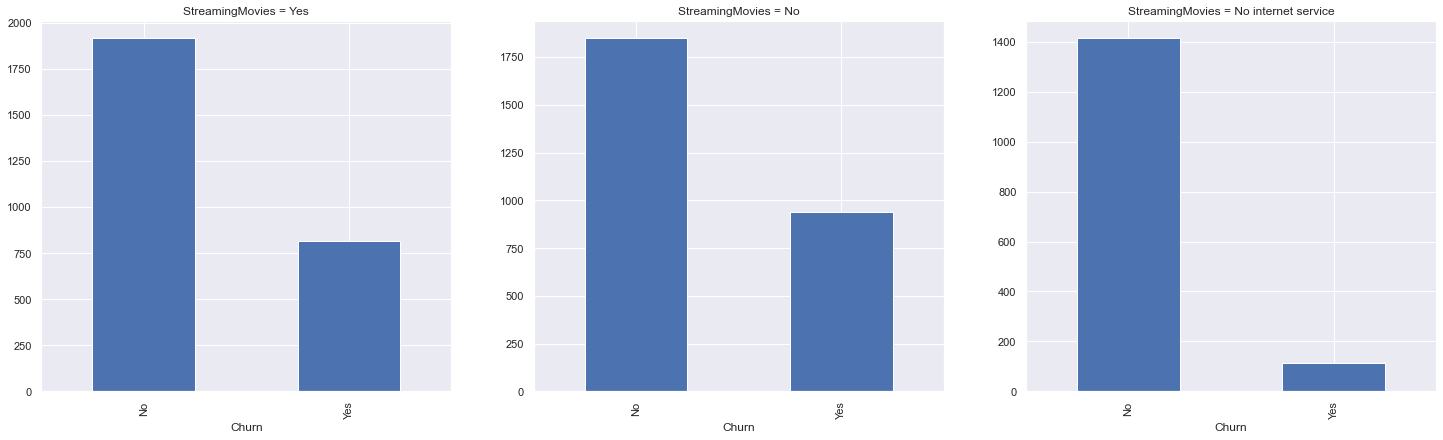

In [37]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('StreamingMovies = Yes')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['Yes'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('StreamingMovies = No')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['No'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('StreamingMovies = No internet service')
dataset.groupby('StreamingMovies').Churn.value_counts().loc['No internet service'].plot(kind='bar')

### Contract

<AxesSubplot:title={'center':'Contract = Two year'}, xlabel='Churn'>

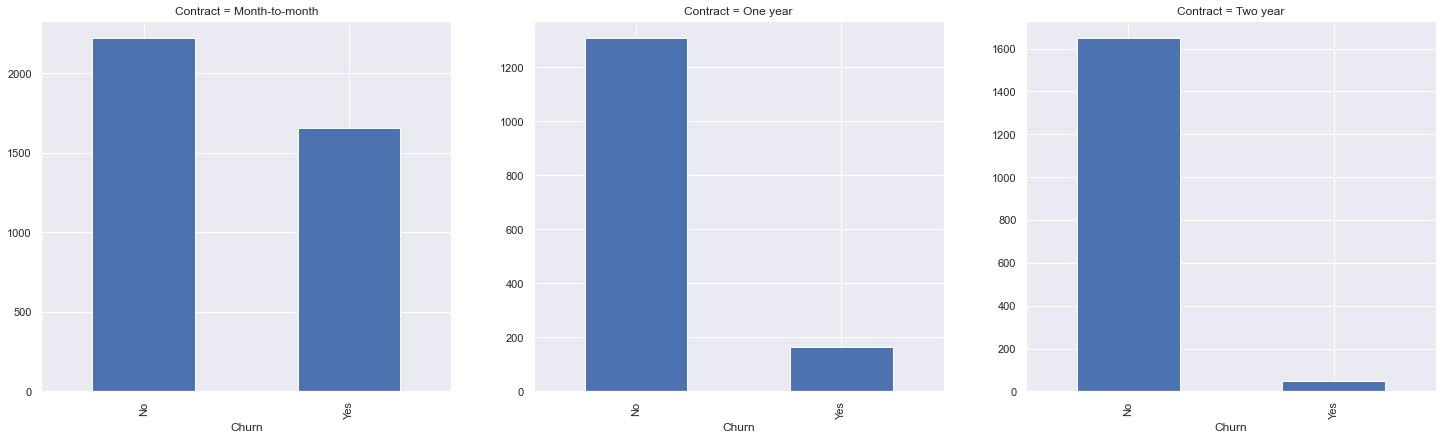

In [38]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
plt.title('Contract = Month-to-month')
dataset.groupby('Contract').Churn.value_counts().loc['Month-to-month'].plot(kind='bar')

plt.subplot(2,3,2)
plt.title('Contract = One year')
dataset.groupby('Contract').Churn.value_counts().loc['One year'].plot(kind='bar')

plt.subplot(2,3,3)
plt.title('Contract = Two year')
dataset.groupby('Contract').Churn.value_counts().loc['Two year'].plot(kind='bar')

# Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

### PaperlessBilling

<AxesSubplot:title={'center':'PaymentMethod = Credit card (automatic)'}, xlabel='Churn'>

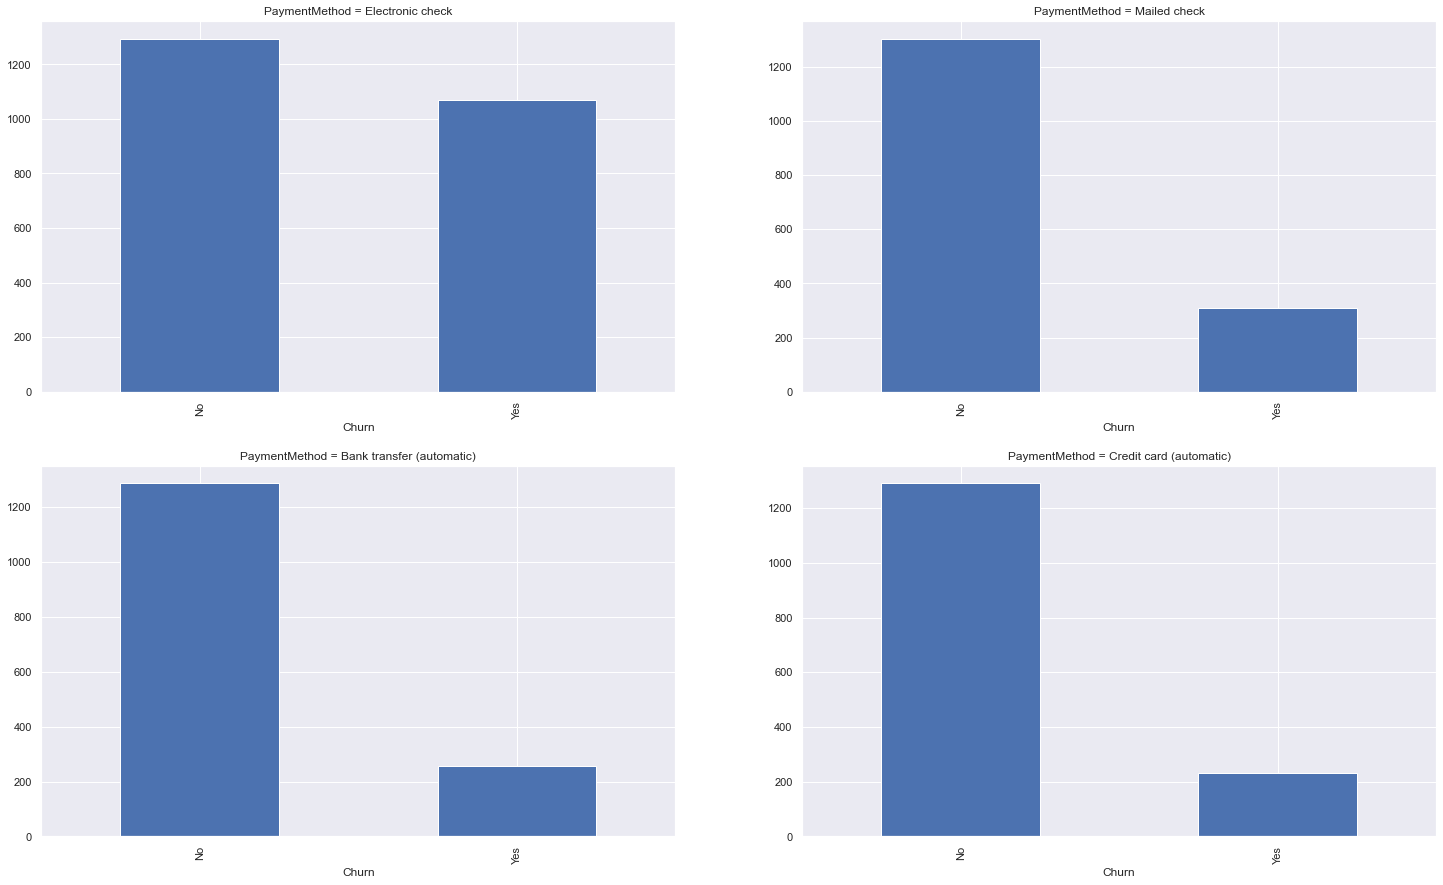

In [39]:

plt.figure(figsize=(25,15))
sns.set_theme(style="darkgrid")

plt.subplot(2,2,1)
plt.title('PaymentMethod = Electronic check')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Electronic check'].plot(kind='bar')

plt.subplot(2,2,2)
plt.title('PaymentMethod = Mailed check')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Mailed check'].plot(kind='bar')

plt.subplot(2,2,3)
plt.title('PaymentMethod = Bank transfer (automatic)')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Bank transfer (automatic)'].plot(kind='bar')

plt.subplot(2,2,4)
plt.title('PaymentMethod = Credit card (automatic)')
dataset.groupby('PaymentMethod').Churn.value_counts().loc['Credit card (automatic)'].plot(kind='bar')

## Electronic check medium are the highest churners


<a id="10"></a>
# Data Visualization

### Numerical values, value ranges and distributions.

Text(0.5, 1.0, 'tenure Interval and Counts')

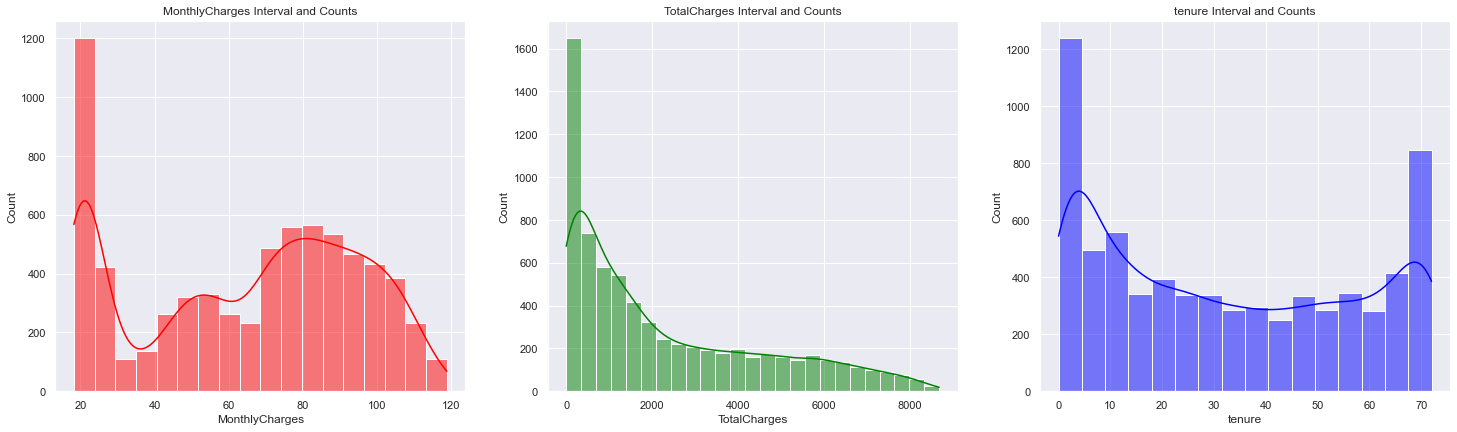

In [40]:
plt.figure(figsize=(25,15))

plt.subplot(2,3,1)
sns.histplot(dataset['MonthlyCharges'], color = 'red', kde = True).set_title('MonthlyCharges Interval and Counts')

plt.subplot(2,3,2)
sns.histplot(dataset['TotalCharges'], color = 'green', kde = True).set_title('TotalCharges Interval and Counts')

plt.subplot(2,3,3)
sns.histplot(dataset['tenure'], color = 'blue', kde = True).set_title('tenure Interval and Counts')

### The relationship between 'MonthlyCharges' and 'TotalCharges' and the correlation with 'gender' and 'tenure'.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

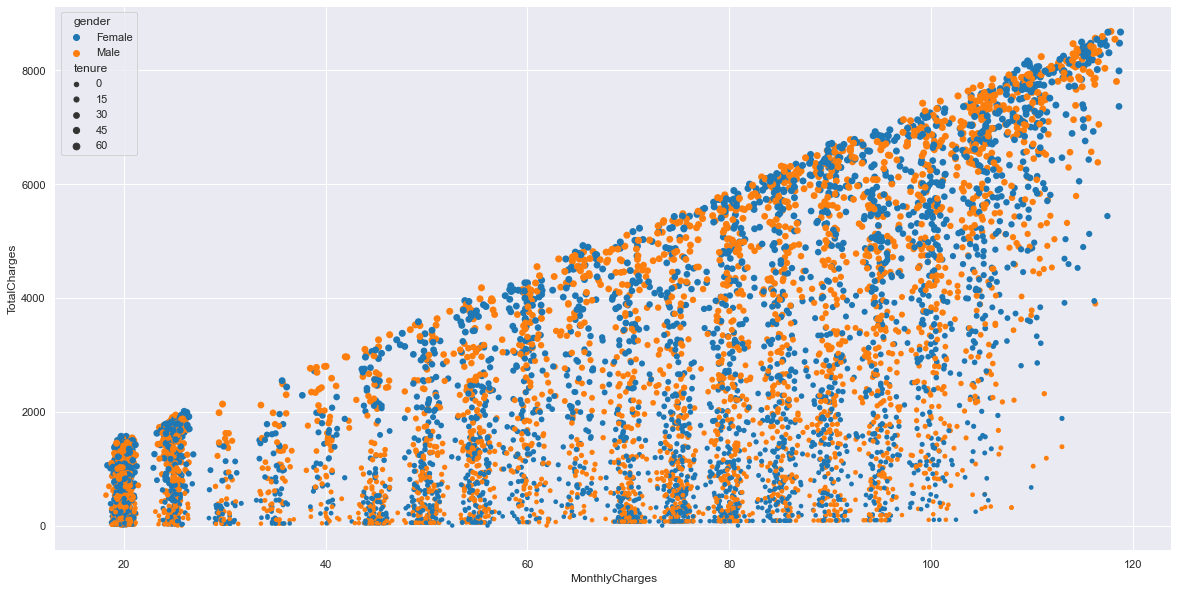

In [41]:
sns.set_style('darkgrid')
f, ax = plt.subplots(figsize=(20,10))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['MonthlyCharges'], y=dataset['TotalCharges'],
                hue=dataset['gender'], 
                size="tenure",
                palette='tab20',
                hue_order=dataset['gender'],
                sizes=(20, 50), 
                linewidth=0,
                data=dataset)

Total Charges increase as Monthly Charges increase - as expected.

### Distribution of Samples According to 'Churn' = Yes or 'Churn' = No with Histograms

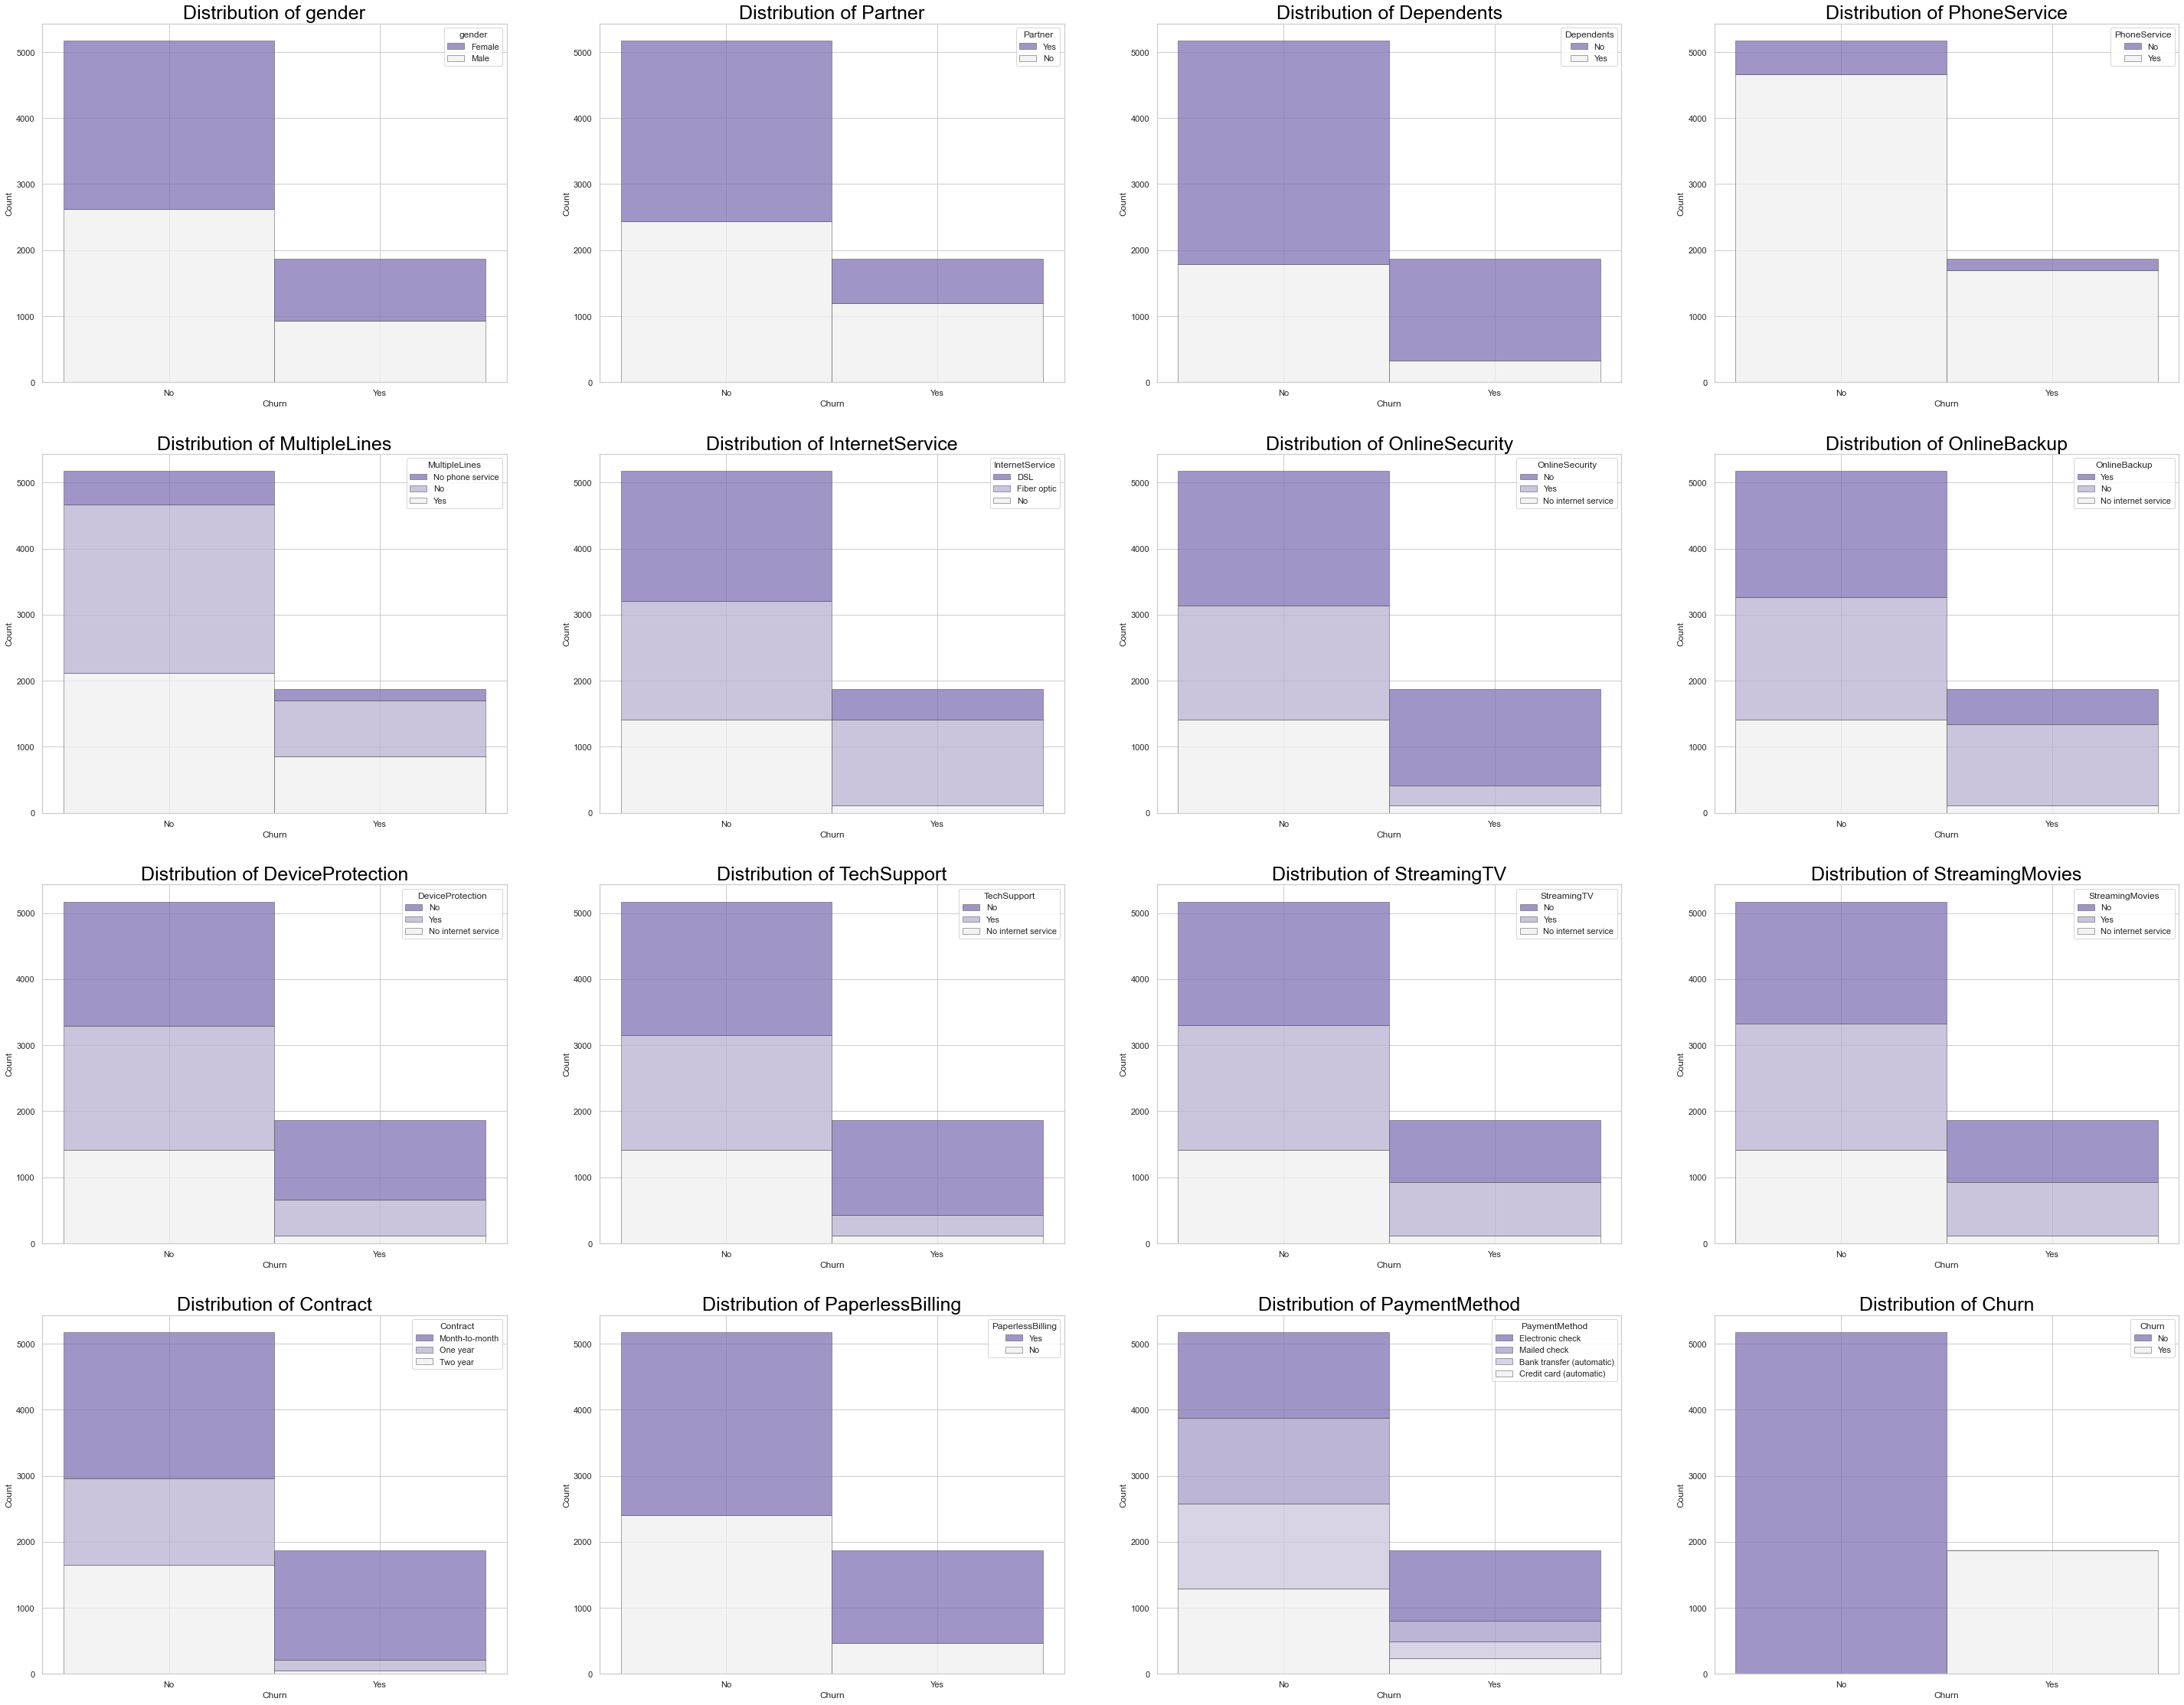

In [42]:
plt.figure(figsize=(50,50))
j = 0
sns.set_theme(style="whitegrid")
for i in categorical_list:
    
    plt.subplot(5,4,j+1)
    sns.histplot(dataset, x="Churn",  hue=dataset[i], multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5)
    plt.title(f'Distribution of {i}',color = 'black',fontsize = 25)
    j += 1

<a id="11"></a>

# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [43]:
 !pip3 install pandas_profiling --upgrade

Requirement already up-to-date: pandas_profiling in c:\users\asus\anaconda3\lib\site-packages (3.0.0)


In [44]:
import pandas_profiling
from pandas_profiling import ProfileReport


In [45]:
pandas_profiling.ProfileReport(dataset)

<a id="12"></a>

# Correlation

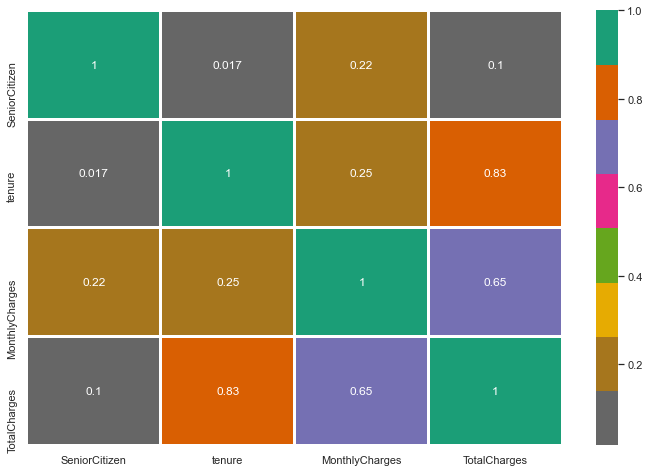

In [46]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

#### Implications:

* As seen from Heat Map, there is a high correlation between 'tenure' and 'TotalCharges'.

* Another notable correlation is between 'MonthlyCharges' and 'TotalCharges'.

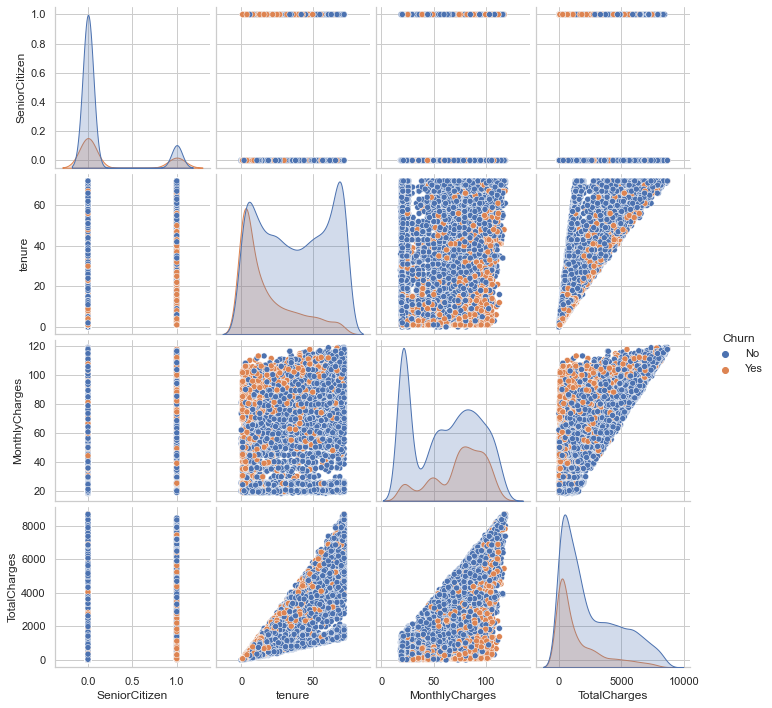

In [47]:
sns.pairplot(dataset, hue = 'Churn')

<a id="13"></a>

# Skewness

In [48]:
dataset.agg(['skew'])

SeniorCitizen   tenure  MonthlyCharges  TotalCharges
skew       1.833633  0.23954       -0.220524      0.963235

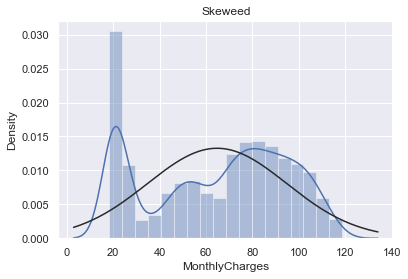

mu MonthlyCharges : 64.76169246059918, sigma MonthlyCharges : 30.087910854936975



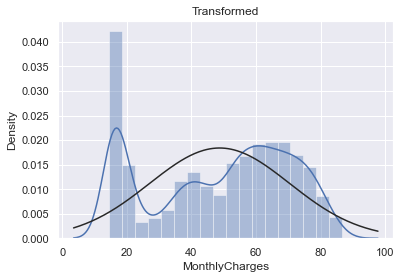

mu MonthlyCharges : 48.7129942491654, sigma MonthlyCharges : 21.702319308412328



In [49]:
skews = ['MonthlyCharges']
from scipy.stats import norm, skew, boxcox
for i in skews:
    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Skeweed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    dataset[i], lam = boxcox(dataset[i])

    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Transformed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

Churn by Monthly Charges and Total Charges


Text(0.5, 1.0, 'Monthly charges by churn')

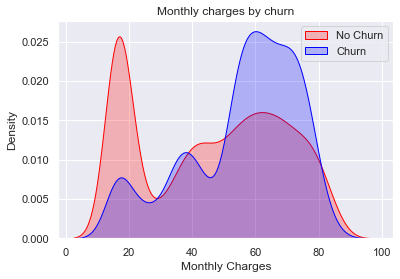

In [50]:
Mth = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == "No") ],
                color="Red", shade = True)
Mth = sns.kdeplot(dataset.MonthlyCharges[(dataset["Churn"] == "Yes") ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn is high when Monthly Charges are high

Text(0.5, 1.0, 'Total charges by churn')

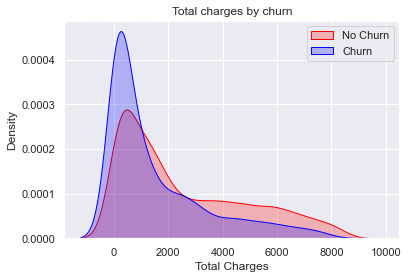

In [51]:
Tot = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == "No") ],
                color="Red", shade = True)
Tot = sns.kdeplot(dataset.TotalCharges[(dataset["Churn"] == "Yes") ],
                ax =Tot, color="Blue", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

**Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz **Higher Monthly Charge**,  **Lower tenure** and **Lower Total Charge** are linkd to **High Churn**.